<h3>Applying linear regression</h3>

The dataset contains information about an e-commerce company which operates both in-store and online<br>
Objectives: <br>
Explore the data and determine weather the company should focus their attention on improving their mobile app or website


<h4>Import libraries</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h4>Loading the data</h4>

In [2]:
customers = pd.read_csv('ecommerce_cust')

Explore the dataset

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


We can see some interesting numerical value columns:

* Avg. Session Length:in-store style advice sessions.
* Time on App: average time spent on app in min.
* Time on Website: average time spent on website in min.
* Length of Membership:years that the customer has been a member

In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


We can see we have 500 entries, which is not a significant amount but we will work with this
<hr>

<h4>Exploring the data</h4>

Let's focus our attention in the numerical value columns

In [6]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

Let's take a look at the correlation between Time on Website and Yearly Amount Spent <br>
A well for, Time on App vs the Yearly Amount Spent

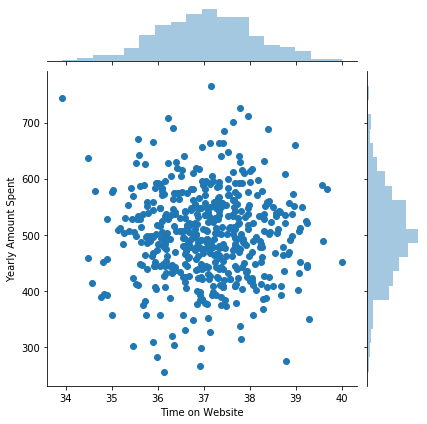

In [7]:
# let's compare the Time on Website vs the Yearly Amount Spent
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers,kind='scatter')

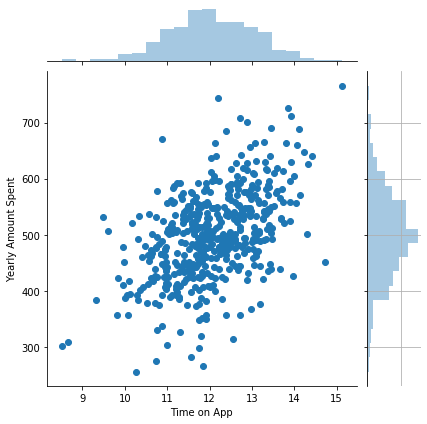

In [8]:
# let's compare the Time on Website vs the Yearly Amount Spent
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers,kind='scatter')
plt.grid()

In [9]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

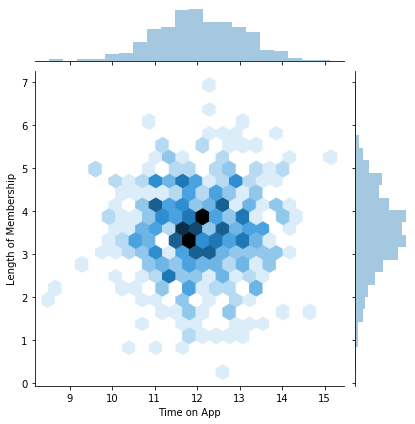

In [10]:
# let's compare Time on App and Length of Membership
sns.jointplot(x='Time on App',y='Length of Membership',data=customers,kind='hex')

Let's explore these types of relationships across the entire data set

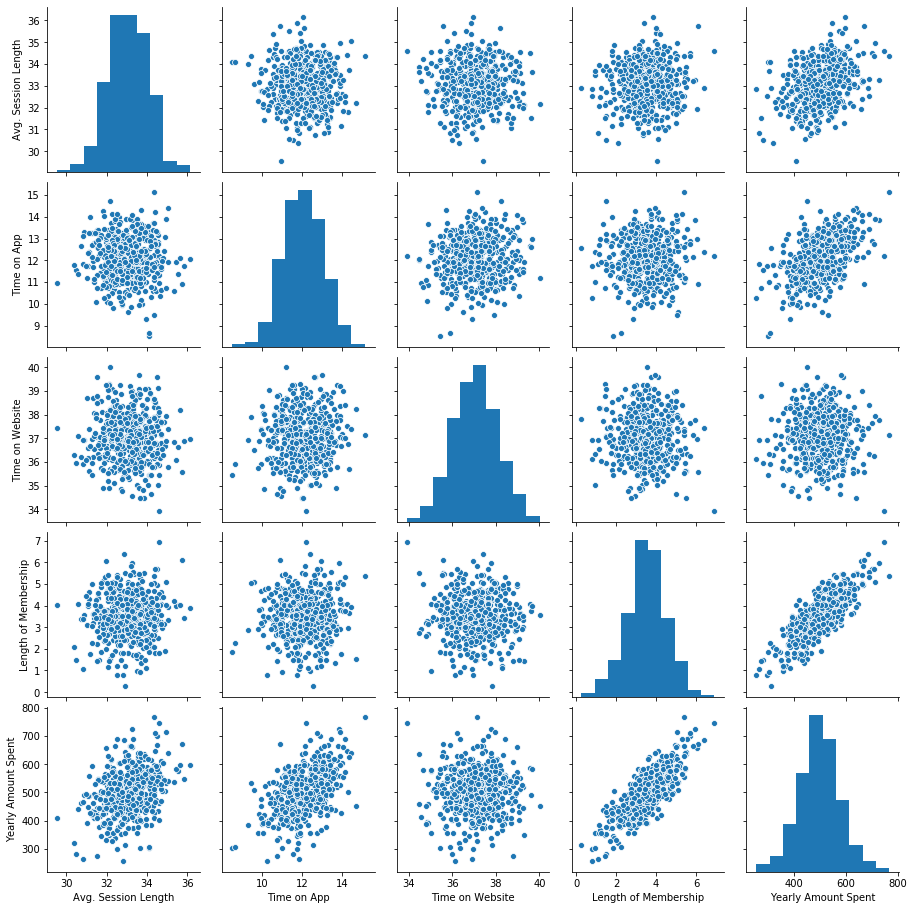

In [11]:
sns.pairplot(customers)

Based off this plot, the most correlated feature with Yearly Amount Spent is Length of Membership. <br>
This makes sense because the longeryou are a member the more likely you are to browse their products.

Let's take a closer look at this correlation of Yearly Amount Spent and Length of Membership

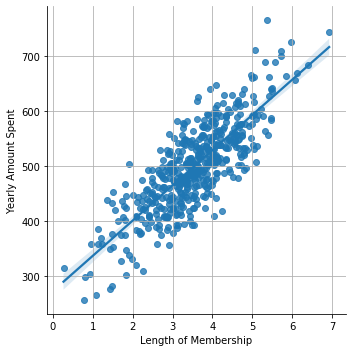

In [12]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)
plt.grid()

We can see a good linear fit, and what seems to be a low error.

<h4>Training and Testing Data</h4>

Let's split the data into training and testing sets. <br>
X will be equal to the numerical features of the customers<br>
y will be equal to the Yearly Amount Spent

In [13]:
customers.head(2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


In [14]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

For the numerical columns I used: Avg. Session Length, Time on App,Time on Website and Length of Membership

In [15]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [16]:
y = customers['Yearly Amount Spent']

<h4>Spliting the Data</h4>

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

<h4>Training the Model</h4>
Import LinearRegression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
# Create an instance of a LinearRegression()
lm = LinearRegression()

Train and fit lm on the training data

In [22]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's take a look at the coefficients of the model

In [23]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


<h4> Predicting Test Data </h4>
let's evaluate its performance by predicting off the test values using the predict method

In [24]:
predictions = lm.predict(X_test)

Let's visualize the real test values in comparison to the predicted values

Text(0, 0.5, 'Predicted Y')

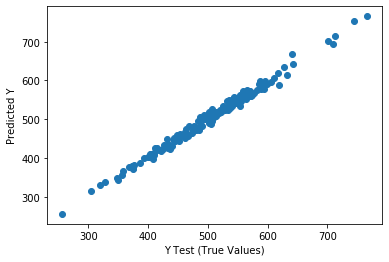

In [25]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Y')

<h4> Evaluating the Model</h4>

Let's evaluate our model performance by calculating:
* Mean Absolute Error
* Mean Squared Error
* Root Mean Squared Error

In [26]:
from sklearn import metrics

In [27]:
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  7.228148653430853
MSE:  79.81305165097481
RMSE:  8.933815066978655


We can see we have a very good model with a good fit.

Let's take a look at the Residuals to  make sure it looks normally distributed.

In [28]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

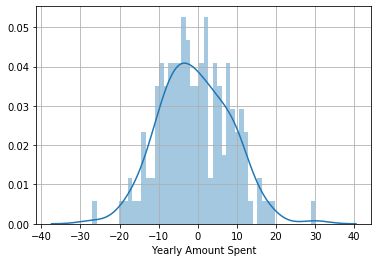

In [29]:
sns.distplot((y_test-predictions),bins=50)
plt.grid()

Let's go back to the original questions, should the company focus their attention on imporving the Web app or website.Let's see if we can interpret the coefficients at all to get an idea.

In [32]:
coeff = pd.DataFrame(lm.coef_, X.columns, columns=['Coeffecient'])

In [33]:
coeff

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


<h3>Final Thoughts</h3>
<p>Based off these coefficients: </p>
Length of Membership seems to have the highest impact with an increase of 61.27 usd <br>
Time on app has an increase of 38.59 usd <br>
Time on website only an increase 0.19 usd,
which is not great <br>
And the Avg Session with an increase of 25.98 usd<br>

<p>We can tackle this question in a variety of angles: </p>

* Probably the obvious answer might be that the company should work on improving their mobile app since it's the one that customers use the most.

* Another thing might be, that the company should improve their website to be as useful as their mobile app, in order to give their customers more options.

* Also, since the Lenght of Membership seems has the highest impact, the company should also focus their efforts in retaining current members by implmenting a rewards system or something similar. A well as working on campains that will allow them to attract new members.

We can see that there are multiple options that we can apply. This is where having a thorough understanding of the business will allow to make impactful business decisions